## 구글 드라이브 마운트

In [1]:
from google.colab import drive
isMount=!df |grep /content/drive
if len(isMount) < 1 : drive.mount('/content/drive', force_remount=False)


## 데이터 위치지정

In [2]:
# Data file 
url = 'https://app.roboflow.com/ds/tX75esMU0w?key=ECuMs0FTTl'
# ProjectName
pName='pen2'


# Base folder Path
# bPath = '/content/yolo/'
bPath = '/content/drive/MyDrive/yolo/'

# Data file Path
dPath = bPath + pName+'/'  

# Working folder Path
wPath = bPath + "yolov5/"



## 폴더 생성, Yolov5 clone

In [3]:
# !rm -rf /content/drive/MyDrive/yolo/*

![ ! -d {bPath} ] && mkdir {bPath}
![ ! -d {dPath} ] && mkdir {dPath}
%cd {bPath}
![ ! -d {wPath} ] && git clone https://github.com/nowage/yolov5



/content/drive/MyDrive/yolo


## Yolov5 환경 설정

In [4]:
!pip uninstall -y imgaug
# !pip uninstall -y PyYAML

Found existing installation: imgaug 0.4.0
Uninstalling imgaug-0.4.0:
  Successfully uninstalled imgaug-0.4.0


- yolo가 설치된 폴더로 이동

In [5]:
%cd {wPath}

/content/drive/MyDrive/yolo/yolov5


- requirements.txt 파일로 필요라이브러리 설치

In [6]:
!pip install -r requirements.txt

## Library Loading

In [7]:
from os.path import join,isfile,isdir
import pandas as pd
import numpy as np


## 데이터셋 다운로드

- roboflow 데이터셋 다운로드

In [8]:
datapath = bPath+pName+'/data.yaml'

if not isdir(dPath+"train/"):
  %cd {dPath}
  !curl -L "{url}" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip    
  !cat {datapath}|sed "s/\.\./\.\.\/{pName}/g" >/tmp/data.yaml
  !mv /tmp/data.yaml {datapath}
else:
  print('기존 Data file 사용')
  %cd {dPath}
  !ls {dPath}



기존 Data file 사용
/content/drive/MyDrive/yolo/pen2
data.yaml  README.dataset.txt  README.roboflow.txt  test  train  valid


# Train

## Train 실행

- yolov5 폴더 이동

In [9]:
%cd {wPath}

/content/drive/MyDrive/yolo/yolov5


- train 파일을 임포트하여 훈련

In [10]:
# # print(datapath)
# !cat {datapath}
# print(wPath+'models/yolov5s.pt')
# !ls /content/drive/MyDrive/yolo/yolov5/models/

In [11]:
# datapath = '../'+pName+'/data.yaml'
# !pwd
# !ls {datapath}

In [12]:
import train
train.run(data=datapath, 
          imgsz=416, 
          batch=4, 
          epochs=1, 
          weights=wPath+'models/yolov5s.pt', 
          name=pName
)


train: weights=/content/drive/MyDrive/yolo/yolov5/models/yolov5s.pt, cfg=, data=/content/drive/MyDrive/yolo/pen2/data.yaml, hyp=data/hyps/hyp.scratch.yaml, epochs=1, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, adam=False, sync_bn=False, workers=8, project=runs/train, entity=None, name=pen2, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, upload_dataset=False, bbox_interval=-1, save_period=-1, artifact_alias=latest, local_rank=-1, freeze=0, patience=100, batch=4
github: up to date with https://github.com/nowage/yolov5 ✅


YOLOv5 🚀 v5.0-442-g41db904 torch 1.10.0+cu111 CUDA:0 (Tesla T4, 15109.75MB)

hyperparameters: lr0=0.01, lrf=0.2, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0, translate=0.1, scale=0.5, shear=0.0, perspective=0.0, flipud=0.0, fliplr=0.5, mosaic=1.0, mixup=0.0, copy_paste=0.0
TensorBoard: Start with 'tensorboard --logdir runs/train', view at http://localhost:6006/


Weights & Biases: run 'pip install wandb' to automatically track and visualize YOLOv5 🚀 runs (RECOMMENDED)


Overriding model.yaml nc=80 with nc=1

                 from  n    params  module                                  arguments                     
  0                -1  1      3520  models.common.Conv                      [3, 32, 6, 2, 2]              
  1                -1  1     18560  models.common.Conv                      [32, 64, 3, 2]                
  2                -1  1     18816  models.common.C3                        [64, 64, 1]                   
  3                -1  1     73984  models.common.Conv                      [64, 128, 3, 2]               
  4                -1  2    115712  models.common.C3                        [128, 128, 2]                 
  5                -1  1    295424  models.common.Conv                      [128, 256, 3, 2]              
  6                -1  3    625152  models.common.C3                        [256, 256, 3]                 
  7                -1  1   1180672  models.common.Conv                      [256, 512, 3, 2]             

Plotting labels... 


Image sizes 416 train, 416 val
Using 2 dataloader workers
Logging results to runs/train/pen25
Starting training for 1 epochs...

     Epoch   gpu_mem       box       obj       cls    labels  img_size



autoanchor: Analyzing anchors... anchors/target = 3.35, Best Possible Recall (BPR) = 0.9921


       0/0      1.7G     0.126   0.02086         0        10       416: 100%|██████████| 6/6 [00:04<00:00,  1.46it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100%|██████████| 1/1 [00:00<00:00,  2.54it/s]


                 all          8          7      0.275      0.286      0.276      0.121



1 epochs completed in 0.002 hours.


Optimizer stripped from runs/train/pen25/weights/last.pt, 14.3MB
Optimizer stripped from runs/train/pen25/weights/best.pt, 14.3MB


Results saved to runs/train/pen25


In [15]:
dir(train)

['Adam',
 'Callbacks',
 'ComputeLoss',
 'DDP',
 'EarlyStopping',
 'FILE',
 'LOCAL_RANK',
 'LOGGER',
 'Loggers',
 'Model',
 'ModelEMA',
 'Path',
 'RANK',
 'SGD',
 'WORLD_SIZE',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'amp',
 'argparse',
 'attempt_download',
 'attempt_load',
 'check_anchors',
 'check_dataset',
 'check_file',
 'check_git_status',
 'check_img_size',
 'check_requirements',
 'check_suffix',
 'check_wandb_resume',
 'check_yaml',
 'colorstr',
 'create_dataloader',
 'de_parallel',
 'deepcopy',
 'dist',
 'fitness',
 'get_latest_run',
 'increment_path',
 'init_seeds',
 'intersect_dicts',
 'labels_to_class_weights',
 'labels_to_image_weights',
 'logging',
 'lr_scheduler',
 'main',
 'math',
 'methods',
 'nn',
 'np',
 'one_cycle',
 'os',
 'parse_opt',
 'plot_evolve',
 'plot_labels',
 'print_mutation',
 'random',
 'run',
 'select_device',
 'set_logging',
 'strip_optimizer',
 'sys',
 'time',
 'torch',
 'torch_d

In [25]:
train.FILE

PosixPath('/content/drive/MyDrive/yolo/yolov5/train.py')

# Detect

## 세팅

- torch 모델을 읽기 위해 import

In [31]:
import torch

## path 설정

In [70]:

mPath=wPath+'runs/train/'+pName+'/weights/best.pt'


In [71]:
!ls {mPath}

/content/drive/MyDrive/yolo/yolov5/runs/train/pen2/weights/best.pt


## 직접 만든 모델 load

In [79]:
print(wPath,mPath)
model = torch.hub.load(wPath, 'custom', path=mPath, source='local') 

/content/drive/MyDrive/yolo/yolov5/ /content/drive/MyDrive/yolo/yolov5/runs/train/pen2/weights/best.pt
requirements: PyYAML>=5.3.1 not found and is required by YOLOv5, attempting auto-update...


YOLOv5 🚀 v5.0-442-g41db904 torch 1.10.0+cu111 CUDA:0 (Tesla T4, 15109.75MB)




requirements: 1 package updated per /content/drive/MyDrive/yolo/yolov5/requirements.txt
requirements: ⚠️ Restart runtime or rerun command for updates to take effect



Fusing layers... 
Model Summary: 213 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


## Image 를 불러와서 test

In [83]:
iPath=dPath+'test/images/KakaoTalk_Photo_2020-12-21-20-36-40_jpeg.rf.d72ff545e262fc80e84b18a2bdc18ce5.jpg'  

# %cd {wPath}

# from glob import glob

# img_list = glob(join(dPath,'valid/images/*.jpg'))

# print(len(img_list))

In [84]:
%cd /content
imgs = [iPath]  # batch of images
# imgs=img_list[6]
# Inference
results = model(img)
results.print()  # or .show(), .save()


image 1/1: 240x180 (no detections)
Speed: 7.5ms pre-process, 15.4ms inference, 0.5ms NMS per image at shape (1, 3, 640, 480)


/content


### results 를 imshow 로 확인하는 법

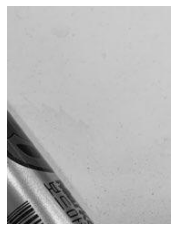

In [82]:
%matplotlib inline
from matplotlib.pyplot import imread,imshow,subplots,axis,title
# ir=plt.imread('~~imgName~~')
# title('~~Title~~') 
axis("Off")
imshow(results.imgs[0])

# 직접 바운딩박스 그리기

## Package install

In [41]:
!pip install imgaug

## 좌표값 확인

In [49]:
print('\n', results.xyxy[0][0])  # print img1 predictions


 tensor([ 1.99219, 10.14844, 55.68750, 76.40625,  0.29199,  0.00000], device='cuda:0')


## import 

In [50]:
%matplotlib inline
import imageio
import imgaug as ia
import pandas as pd

## original 이미지 확인

Original:


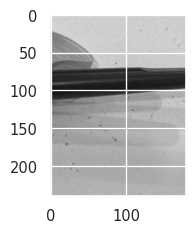

In [56]:
# image = imageio.imread(iPath)

print("Original:")
ia.imshow(img)

## 바운딩박스를 그리는 함수 만들기

In [52]:

def bbsOnImage(img,bs):

    bbs = ia.BoundingBoxesOnImage(bs, shape=img.shape)

    image_with_bbs = bbs.draw_on_image(img)

    # image_with_bbs = ia.BoundingBox(
    #     x1=50.5, y1=10.5, x2=100.5, y2=16.5
    # ).draw_on_image(image_with_bbs, color=(255, 0, 0), size=3)
    return image_with_bbs

## 바운딩박스 그리기

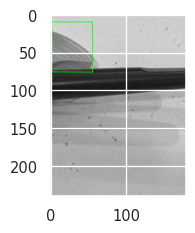

In [57]:

for i in results.xyxy :
  for t in i :
    x1re = float(t[0])
    x2re = float(t[2])
    y1re = float(t[1])
    y2re = float(t[3])
    bs=[
      ia.BoundingBox(x1=x1re, y1=y1re, x2=x2re, y2=y2re)
    ]
    timage = bbsOnImage(img,bs)
ia.imshow(timage)